In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [42]:
df = pd.read_csv('active_User_per_30_days.csv')

C:\Windows\Temp\ipykernel_8112\2140576529.py:1: DtypeWarning: Columns (37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('active_User_per_30_days.csv')


In [43]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_language,...,authority_cat,care_cat,fairness_cat,purity_cat,loyalty_cat,7day_cut,14day_cut,30day_cut,60day_cut,90day_cut
0,6,6,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,en,...,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
1,7,7,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,en,...,Non,Care,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
2,12,12,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,en,...,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
3,26,26,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,en,...,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
4,27,27,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,en,...,Non,Non,Non,Degradation,Mixed,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"


In [44]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Datetime', 'Tweet_id', 'Tweet_content',
       'Tweet_reply_count', 'Tweet_retweet_count', 'Tweet_like_count',
       'Tweet_quote_count', 'Tweet_language', 'Tweet_place', 'Tweet_hashtags',
       'Username', 'User_id', 'User_followers_count', 'User_friends_count',
       'User_statuses_count', 'User_favourites_count', 'User_listed_count',
       'User_media_count', 'User_location', 'Tweet_isRT', 'results', 'hateful',
       'aggressive', 'HorA', 'care', 'fairness', 'loyalty', 'authority',
       'purity', 'Unnamed: 0', 'authority_cat', 'care_cat', 'fairness_cat',
       'purity_cat', 'loyalty_cat', '7day_cut', '14day_cut', '30day_cut',
       '60day_cut', '90day_cut'],
      dtype='object')

In [45]:
df = df[['Datetime', 'Tweet_id', 'Tweet_content',
       'Tweet_reply_count', 'Tweet_retweet_count', 'Tweet_like_count',
       'Tweet_quote_count', 'Tweet_hashtags',
       'Username', 'User_id', 'User_followers_count', 'User_friends_count',
       'User_statuses_count', 'User_favourites_count', 'User_listed_count',
       'User_media_count', 'HorA', 'care', 'fairness', 'loyalty', 'authority',
       'purity','authority_cat', 'care_cat', 'fairness_cat',
       'purity_cat', 'loyalty_cat','30day_cut']]

In [53]:
df.head()

,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,User_id,...,fairness,loyalty,authority,purity,authority_cat,care_cat,fairness_cat,purity_cat,loyalty_cat,30day_cut
0,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,"['PutinsWar', 'UkraineRussiaCrisis', 'Ukraina'...",anyidea,23024287,...,0.0,0.00,0.0,0.0,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-24)"
1,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,"['India', 'Kashmir', 'India', 'Dubai', 'COVID1...",AhmedFidous,1334012207286325249,...,0.0,0.00,0.0,0.0,Non,Care,Non,Non,Non,"[2022-02-22, 2022-03-24)"
2,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCon...",prime_scoop,1486283164846747649,...,0.0,0.00,0.0,0.0,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-24)"
3,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,"['PutinsWar', 'SatansSpeech', 'PutinSpeech', '...",anyidea,23024287,...,0.0,0.00,0.0,0.0,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-24)"
4,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,"['criminals', 'Russia', 'Iran', 'Syria', 'Cowa...",Basel_Saneeb,1588526876,...,0.0,3.25,0.0,3.0,Non,Non,Non,Degradation,Mixed,"[2022-02-22, 2022-03-24)"


In [60]:
df['30day_cut'].value_counts()

[2022-02-22, 2022-03-24)    788454
[2022-03-24, 2022-04-23)    511543
[2022-04-23, 2022-05-23)    382645
[2022-05-23, 2022-06-22)    285458
[2022-06-22, 2022-07-22)    254926
[2022-07-22, 2022-08-21)    232124
[2022-08-21, 2022-09-10)    164647
Name: 30day_cut, dtype: int64

In [7]:
df.pivot_table(index='User_id', values='Tweet_id', aggfunc=len).sort_values(by = 'Tweet_id', ascending=False)

,Tweet_id
User_id,
29123084,34002
1499763123603050497,23260
88196314,20033
1452730505787551750,19374
21729540,14035
...,...
1327444965216153600,8
1430843665484820483,7
2462990324,7


<AxesSubplot:ylabel='Density'>

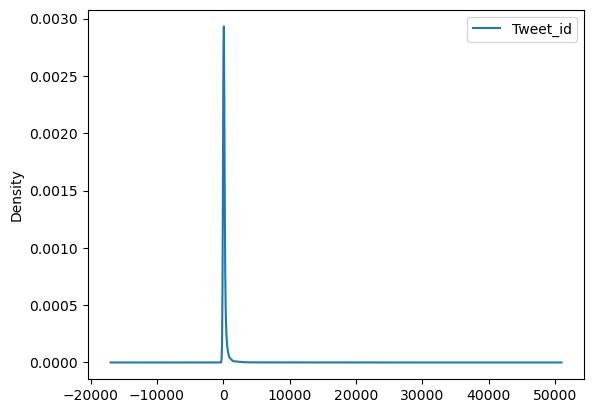

In [8]:
df.pivot_table(index='User_id', values='Tweet_id', aggfunc=len).sort_values(by = 'Tweet_id', ascending=False).plot.density()

In [9]:
df.pivot_table(index='User_id', values=['care','fairness','purity','authority',
                                       'loyalty'], aggfunc=np.mean).sort_values(by = 'care', ascending=False)

,authority,care,fairness,loyalty,purity
User_id,,,,,
1112896007774371840,0.000000,8.600000,0.00,0.000000,0.000000
1108807484,0.000000,8.359204,0.00,0.059701,7.912313
115088543,0.000000,8.277193,0.00,8.000000,2.250000
117000756,0.200031,7.883411,0.00,7.909505,0.034315
2733323288,0.000000,7.800000,0.00,0.000000,0.000000
...,...,...,...,...,...
1047135212935819264,0.000000,0.000000,0.00,0.019016,0.000000
1659823890,0.000000,0.000000,0.00,0.000000,0.000000
489785630,0.000000,0.000000,0.00,0.000000,0.637500


<AxesSubplot:ylabel='Density'>

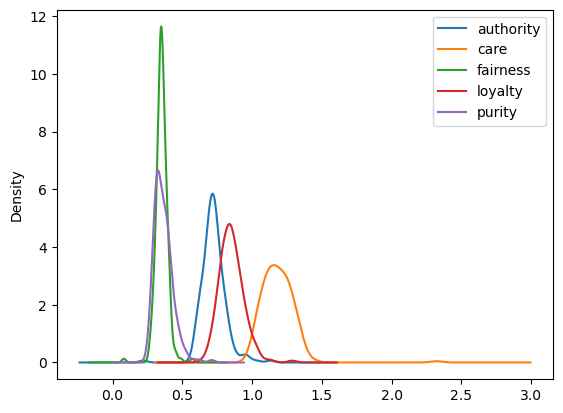

In [10]:
df.pivot_table(index = 'Datetime', values=['authority','care','fairness','loyalty','purity'],
               aggfunc={'authority':np.mean,'care':np.mean,'fairness':np.mean,'loyalty':np.mean,'purity':np.mean,}).plot.density()

array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>], dtype=object)

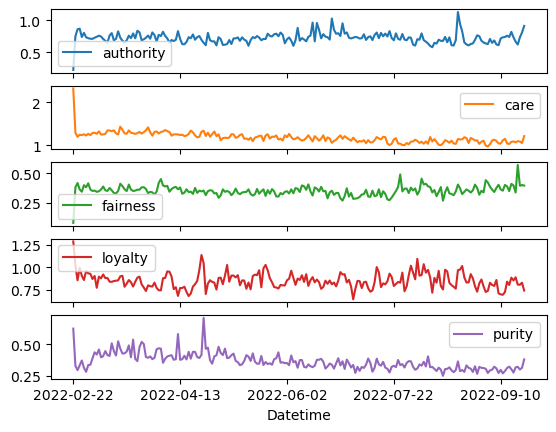

In [11]:
df.pivot_table(index = 'Datetime', values=['authority','care','fairness','loyalty','purity'],
               aggfunc={'authority':np.mean,'care':np.mean,'fairness':np.mean,'loyalty':np.mean,'purity':np.mean,}).plot.line(subplots=True)

In [12]:
cross_table = pd.crosstab(df['HorA'], df['care_cat'], margins=True)
cross_table

care_cat,Care,Harm,Mixed,Non,All
HorA,,,,,
0,115038,810638,160536,1493504,2579716
1,5155,70025,10615,65242,151037
All,120193,880663,171151,1558746,2730753


In [13]:
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(cross_table)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [14]:
cross_table = pd.crosstab(df['HorA'], df['authority_cat'], margins=True)
stat, p, dof, expected = stats.chi2_contingency(cross_table)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 4.413706447809801e-261
Dependent (reject H0)


In [15]:
cross_table = pd.crosstab(df['HorA'], df['fairness_cat'], margins=True)
stat, p, dof, expected = stats.chi2_contingency(cross_table)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [16]:
cross_table = pd.crosstab(df['HorA'], df['purity_cat'], margins=True)
stat, p, dof, expected = stats.chi2_contingency(cross_table)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [17]:
cross_table = pd.crosstab(df['HorA'], df['loyalty_cat'], margins=True)
stat, p, dof, expected = stats.chi2_contingency(cross_table)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [19]:
df.head()

,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,User_id,...,fairness,loyalty,authority,purity,authority_cat,care_cat,fairness_cat,purity_cat,loyalty_cat,30day_cut
0,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,"['PutinsWar', 'UkraineRussiaCrisis', 'Ukraina'...",anyidea,23024287,...,0.0,0.00,0.0,0.0,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-24)"
1,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,"['India', 'Kashmir', 'India', 'Dubai', 'COVID1...",AhmedFidous,1334012207286325249,...,0.0,0.00,0.0,0.0,Non,Care,Non,Non,Non,"[2022-02-22, 2022-03-24)"
2,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCon...",prime_scoop,1486283164846747649,...,0.0,0.00,0.0,0.0,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-24)"
3,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,"['PutinsWar', 'SatansSpeech', 'PutinSpeech', '...",anyidea,23024287,...,0.0,0.00,0.0,0.0,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-24)"
4,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,"['criminals', 'Russia', 'Iran', 'Syria', 'Cowa...",Basel_Saneeb,1588526876,...,0.0,3.25,0.0,3.0,Non,Non,Non,Degradation,Mixed,"[2022-02-22, 2022-03-24)"


In [61]:
ddf = df.pivot_table(index=['User_id','30day_cut'], values=['care','fairness','purity','authority',
                                       'loyalty','HorA'], aggfunc=np.mean)

In [66]:
ddf.index

MultiIndex([(               1378, '[2022-02-22, 2022-03-24)'),
            (               1378, '[2022-03-24, 2022-04-23)'),
            (               1378, '[2022-04-23, 2022-05-23)'),
            (               1378, '[2022-05-23, 2022-06-22)'),
            (               1378, '[2022-06-22, 2022-07-22)'),
            (               1378, '[2022-07-22, 2022-08-21)'),
            (               1378, '[2022-08-21, 2022-09-10)'),
            (               2654, '[2022-02-22, 2022-03-24)'),
            (               2654, '[2022-03-24, 2022-04-23)'),
            (               2654, '[2022-04-23, 2022-05-23)'),
            ...
            (1506379836465549314, '[2022-06-22, 2022-07-22)'),
            (1506379836465549314, '[2022-07-22, 2022-08-21)'),
            (1506379836465549314, '[2022-08-21, 2022-09-10)'),
            (1506717607235182592, '[2022-02-22, 2022-03-24)'),
            (1506717607235182592, '[2022-03-24, 2022-04-23)'),
            (1506717607235182592, '[202

In [29]:
!pip install --upgrade statsmodels

     ---------------------------------------- 9.2/9.2 MB 3.9 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2


In [34]:
import statsmodels.api as sm

# 读取数据
data = ddf

# 拆分数据集
X = data[['care', 'fairness', 'authority', 'purity', 'loyalty']]
y = data['HorA']

# 添加截距项
X = sm.add_constant(X)

# 拟合逻辑回归模型
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 打印结果
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.116184
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   HorA   No. Observations:                94472
Model:                          Logit   Df Residuals:                    94466
Method:                           MLE   Df Model:                            5
Date:                Tue, 28 Mar 2023   Pseudo R-squ.:                 -0.4784
Time:                        19:22:30   Log-Likelihood:                -10976.
converged:                       True   LL-Null:                       -7424.4
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0359      0.023   -130.775      0.000      -3.081      -2.990
care           0.0455      0.

由于0代表不包含道德，1代表Vice，9代表Virtue，0到1之间是截断的并且不均匀的，所以应该把数据重新处理一下。考虑到不包含道德和道德中立概念相近，把1处理为-1，9处理为1，0继续保留为0。

In [6]:
def normalize_data(data):
    if data ==0:
        return 0
    else:
        return (data-1)/4-1

In [7]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_language,...,authority_cat,care_cat,fairness_cat,purity_cat,loyalty_cat,7day_cut,14day_cut,30day_cut,60day_cut,90day_cut
0,6,6,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,en,...,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
1,7,7,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,en,...,Non,Care,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
2,12,12,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,en,...,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
3,26,26,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,en,...,Non,Harm,Non,Non,Non,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"
4,27,27,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,en,...,Non,Non,Non,Degradation,Mixed,"[2022-02-22, 2022-03-01)","[2022-02-22, 2022-03-08)","[2022-02-22, 2022-03-24)","[2022-02-22, 2022-04-23)","[2022-02-22, 2022-05-23)"


In [8]:
df.fairness = df.fairness.apply(normalize_data)

In [9]:
df.loyalty = df.loyalty.apply(normalize_data)
df.authority = df.authority.apply(normalize_data)
df.purity = df.purity.apply(normalize_data)
df.care = df.care.apply(normalize_data)

In [23]:
ddf = df.pivot_table(index=['User_id','30day_cut'], values=['care','fairness','purity','authority',
                                       'loyalty','HorA'], aggfunc=np.mean)

In [36]:
ddf = ddf.reset_index()

In [37]:
ddf

,User_id,30day_cut,HorA,authority,care,fairness,loyalty,purity
0,1378,"[2022-02-22, 2022-03-24)",0.007168,0.041622,-0.411163,0.017116,0.033132,-0.002748
1,1378,"[2022-03-24, 2022-04-23)",0.004566,0.025209,-0.622084,0.012965,0.044747,0.019273
2,1378,"[2022-04-23, 2022-05-23)",0.000000,0.035638,-0.526144,0.023284,0.061180,-0.017004
3,1378,"[2022-05-23, 2022-06-22)",0.000000,0.092585,-0.552907,0.045290,0.122768,-0.010870
4,1378,"[2022-06-22, 2022-07-22)",0.000000,0.056713,-0.539043,0.028935,0.019965,0.006944
...,...,...,...,...,...,...,...,...
94467,1506717607235182592,"[2022-04-23, 2022-05-23)",0.000000,0.000000,-0.833333,0.000000,0.000000,0.000000
94468,1506717607235182592,"[2022-05-23, 2022-06-22)",0.000000,0.072917,-0.208333,0.197917,0.085938,0.000000
94469,1506717607235182592,"[2022-06-22, 2022-07-22)",0.000000,0.000000,-0.898810,0.000000,0.000000,0.000000
94470,1506717607235182592,"[2022-07-22, 2022-08-21)",0.000000,0.015278,-0.708113,-0.013889,0.088889,0.000000


In [59]:
import statsmodels.api as sm

# 读取数据
data = ddf

# 拆分数据集
X = data[['care', 'fairness', 'authority', 'purity', 'loyalty']]
y = data['HorA']

# 添加截距项
X = sm.add_constant(X)

# 拟合逻辑回归模型
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 打印结果
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.114747
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   HorA   No. Observations:                94472
Model:                          Logit   Df Residuals:                    94466
Method:                           MLE   Df Model:                            5
Date:                Tue, 28 Mar 2023   Pseudo R-squ.:                 -0.4601
Time:                        20:20:55   Log-Likelihood:                -10840.
converged:                       True   LL-Null:                       -7424.4
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0987      0.021   -146.217      0.000      -3.140      -3.057
care          -1.0216      0.

Pseudo R-squared 为负数说明模型的拟合效果不如使用平均值预测的效果好。这意味着模型的预测误差大于使用平均值预测的误差。一塌糊涂！

In [69]:
ddf.describe()

,HorA,authority,care,fairness,loyalty,purity
count,94472.000000,94472.000000,94472.000000,94472.000000,94472.000000,94472.000000
mean,0.054366,0.029781,-0.204346,0.026175,0.028979,0.013584
std,0.136935,0.104617,0.265016,0.078949,0.125573,0.105394
min,0.000000,-0.812500,-1.000000,-0.458333,-1.000000,-0.900000
25%,0.000000,0.000000,-0.349419,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-0.155548,0.000000,0.000000,0.000000
75%,0.038462,0.040000,0.000000,0.020798,0.042208,0.008839
max,1.000000,0.950000,0.950000,1.000000,0.975000,1.000000


In [110]:
#自变量之间的共线性检验
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 将需要检测的变量放入一个列表中
variables = ['care', 'fairness', 'authority', 'purity', 'loyalty']

# 创建一个新的DataFrame，只包含需要检测的变量
new_df = ddf[variables]

# 计算VIF值
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_df.values, i) for i in range(new_df.shape[1])]
vif["features"] = new_df.columns

# 输出结果
print(vif)

   VIF Factor   features
0    1.064128       care
1    1.047720   fairness
2    1.059330  authority
3    1.006710     purity
4    1.038962    loyalty


五个道德维度之间不存在多重共线性问题

In [108]:
import statsmodels.api as sm

# 将数据按照个体分组
groups = ddf.groupby('User_id')

# 定义自变量和因变量
y = groups['HorA'].mean()
X = groups[['care', 'fairness', 'authority', 'purity', 'loyalty']].mean()

# 拟合OLS回归模型
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# 输出结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   HorA   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     204.6
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          6.47e-211
Time:                        21:24:18   Log-Likelihood:                 13990.
No. Observations:               13496   AIC:                        -2.797e+04
Df Residuals:                   13490   BIC:                        -2.792e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0407      0.001     30.864      0.0

In [15]:
ddf.head()

,User_id,30day_cut,HorA,authority,care,fairness,loyalty,purity
0,1378,"[2022-02-22, 2022-03-24)",0.007168,0.041622,-0.411163,0.017116,0.033132,-0.002748
1,1378,"[2022-03-24, 2022-04-23)",0.004566,0.025209,-0.622084,0.012965,0.044747,0.019273
2,1378,"[2022-04-23, 2022-05-23)",0.000000,0.035638,-0.526144,0.023284,0.061180,-0.017004
3,1378,"[2022-05-23, 2022-06-22)",0.000000,0.092585,-0.552907,0.045290,0.122768,-0.010870
4,1378,"[2022-06-22, 2022-07-22)",0.000000,0.056713,-0.539043,0.028935,0.019965,0.006944


这个模型的R-squared为0.070，说明自变量只能解释因变量的7%。但是，F-statistic为204.6，Prob (F-statistic)为6.47e-211，说明回归系数非常显著。AIC和BIC的值也比较小，说明这个模型拟合得还不错。但是，这个模型只能解释因变量的7%，可能需要更多的自变量来提高拟合度。

In [41]:
from linearmodels import PanelOLS
reg_fe = PanelOLS.from_formula('HorA ~ care + fairness + authority + purity + loyalty + EntityEffects', data=ddf)
results_fe = reg_fe.fit()
print(results_fe)

FactorEvaluationError: Unable to evaluate factor `HorA`. [KeyError: 'HorA']

In [18]:
from linearmodels import PanelOLS
from linearmodels.panel import generate_panel_data
panel_data = generate_panel_data()
mod = PanelOLS.from_formula("y ~ 1 + x1 + EntityEffects", panel_data.data)
res = mod.fit(cov_type="clustered", cluster_entity=True)

In [14]:
ddf.HorA

0        0.007168
1        0.004566
2        0.000000
3        0.000000
4        0.000000
           ...   
94467    0.000000
94468    0.000000
94469    0.000000
94470    0.000000
94471    0.000000
Name: HorA, Length: 94472, dtype: float64

In [71]:
#"H:\课程\毕业论文\2022-Ukraine-Russia-War-Dataset-main\data\russia_losses_personnel.json"
wardf = pd.read_json("H:\\课程\毕业论文\\2022-Ukraine-Russia-War-Dataset-main\\data\\russia_losses_personnel.json")

In [72]:
wardf.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0


In [73]:
daily_personnel=[2800]
for i in range(0,len(wardf)-1):
    daily_per = wardf.loc[i+1].personnel- wardf.loc[i].personnel
    daily_personnel.append(daily_per)

In [74]:
wardf['daily_personnel'] = daily_personnel

In [75]:
wardf.date = pd.to_datetime(wardf.date,format='%Y-%m-%d')

<AxesSubplot:>

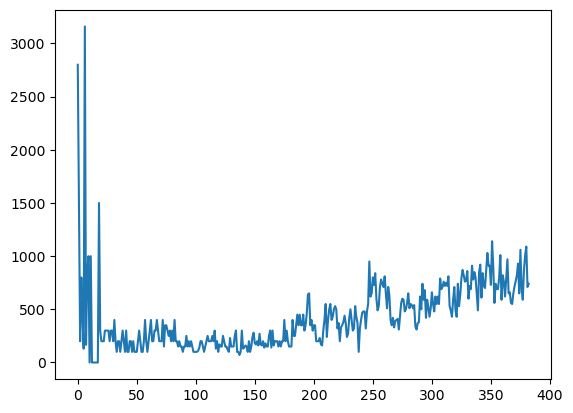

In [76]:
wardf.daily_personnel.plot()

In [77]:
wardf = wardf.rename(columns={'date':'Datetime'})

array([<AxesSubplot:xlabel='30day_cut'>, <AxesSubplot:xlabel='30day_cut'>,
       <AxesSubplot:xlabel='30day_cut'>], dtype=object)

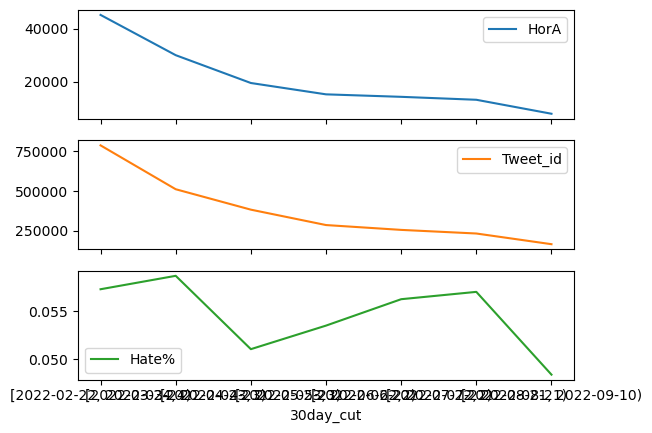

In [63]:
#加入仇恨推文占总推文的比例历时图
ptable = df.pivot_table(index = '30day_cut', values=['HorA','Tweet_id'],
               aggfunc={'HorA':np.sum, 'Tweet_id':len })
ptable['Hate%'] = ptable.apply(lambda x: x['HorA'] / x['Tweet_id'], axis=1)
ptable.plot.line(subplots=True)

In [64]:
ptable.head()

,HorA,Tweet_id,Hate%
30day_cut,,,
"[2022-02-22, 2022-03-24)",45160,788454,0.057277
"[2022-03-24, 2022-04-23)",30011,511543,0.058668
"[2022-04-23, 2022-05-23)",19540,382645,0.051066
"[2022-05-23, 2022-06-22)",15274,285458,0.053507
"[2022-06-22, 2022-07-22)",14338,254926,0.056244


In [67]:
from datetime import timedelta
#cut time series by 30 days
ini_time = wardf.iloc[0].Datetime
end_time = wardf.iloc[-1].Datetime
time_series_30day = []

while ini_time < end_time:
    time_series_30day.append(ini_time)
    ini_time = ini_time+timedelta(days=30)
    
time_series_30day.append(end_time+timedelta(days=1))

wardf['30day_cut'] = pd.cut(wardf['Datetime'], bins=time_series_30day, include_lowest=True, right=False)

In [68]:
wardf.head()

,Datetime,day,personnel,personnel*,POW,daily_personnel,30day_cut
0,2022-02-25,2,2800,about,0.0,2800,"[2022-02-25, 2022-03-27)"
1,2022-02-26,3,4300,about,0.0,1500,"[2022-02-25, 2022-03-27)"
2,2022-02-27,4,4500,about,0.0,200,"[2022-02-25, 2022-03-27)"
3,2022-02-28,5,5300,about,0.0,800,"[2022-02-25, 2022-03-27)"
4,2022-03-01,6,5710,about,200.0,410,"[2022-02-25, 2022-03-27)"


In [69]:
ptable = pd.merge(ptable, wardf, on='30day_cut')

In [70]:
ptable.head()

,30day_cut,HorA,Tweet_id,Hate%,Datetime,day,personnel,personnel*,POW,daily_personnel
